In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(here)
library(SeuratObject)
library(Matrix)
library(RColorBrewer)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

here() starts at /global/u1/m/margot

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ readr   2.1.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


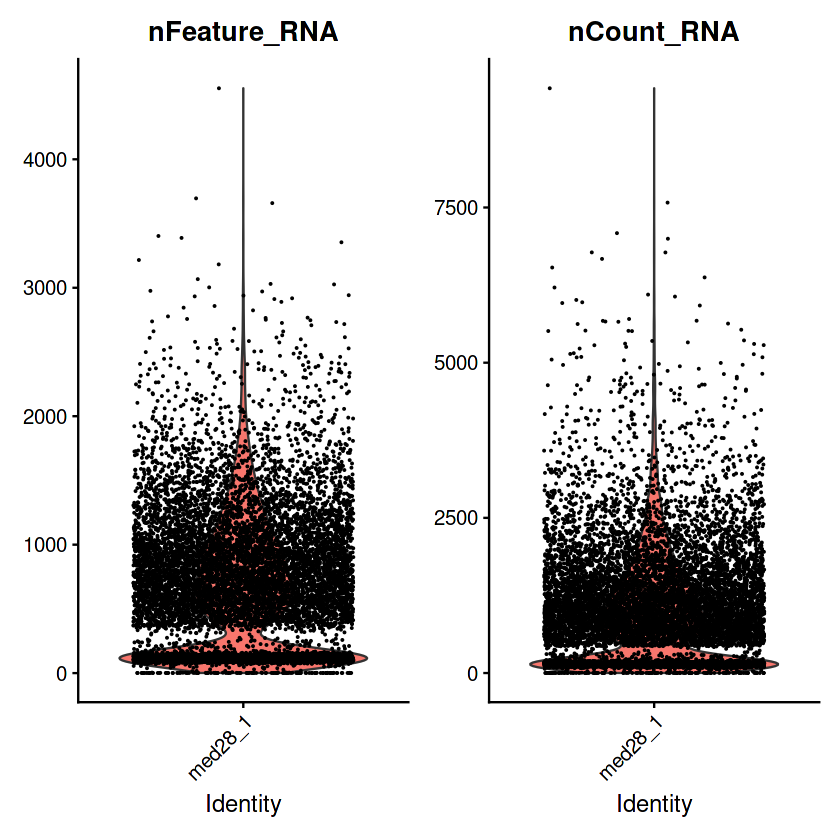

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


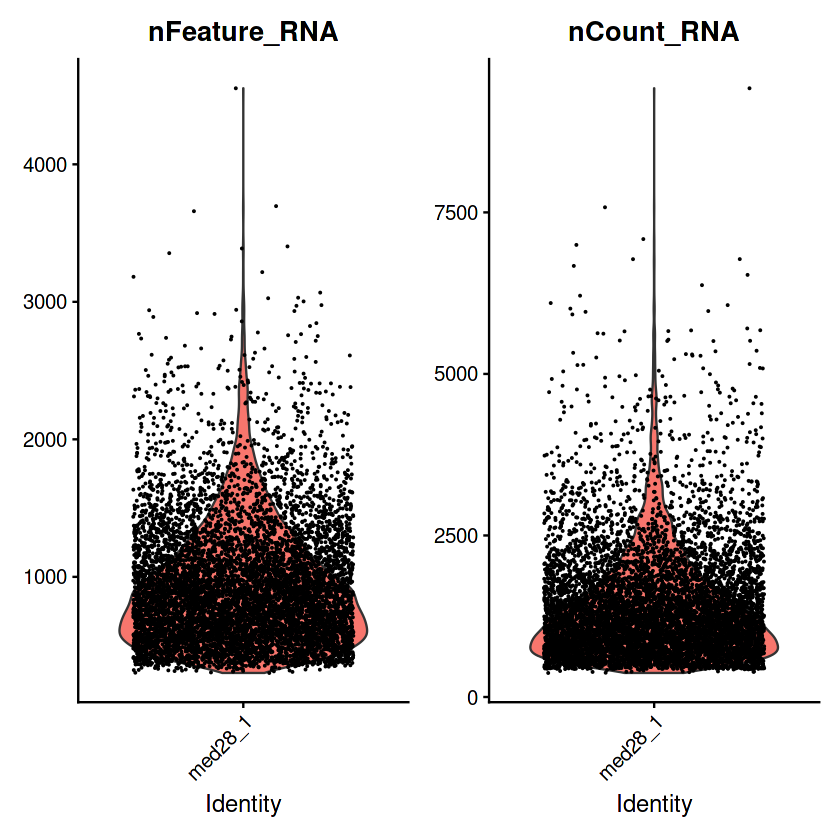

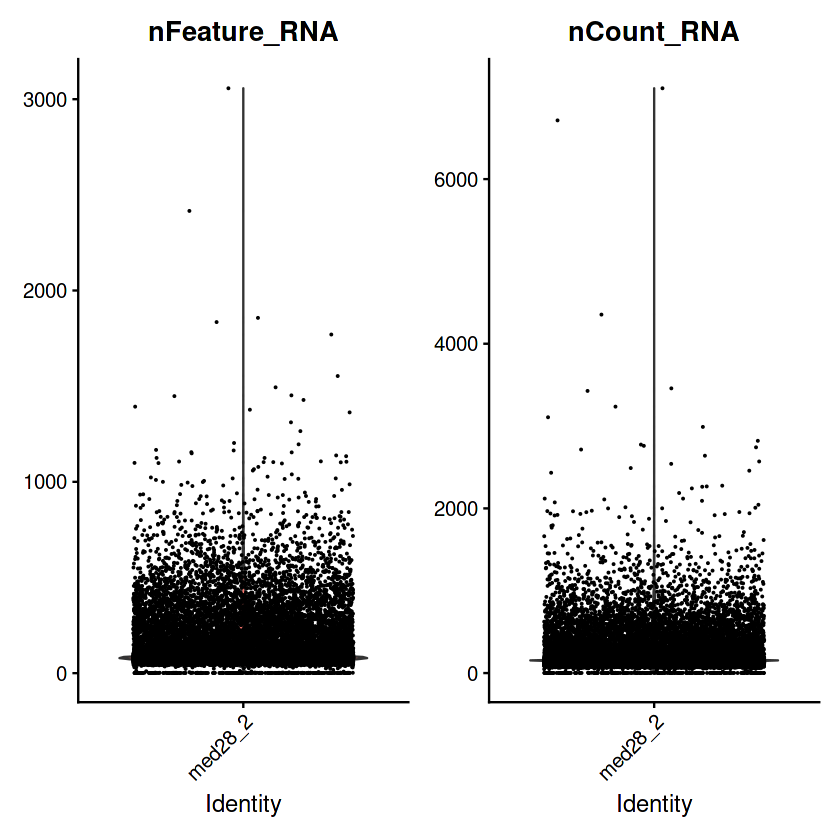

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


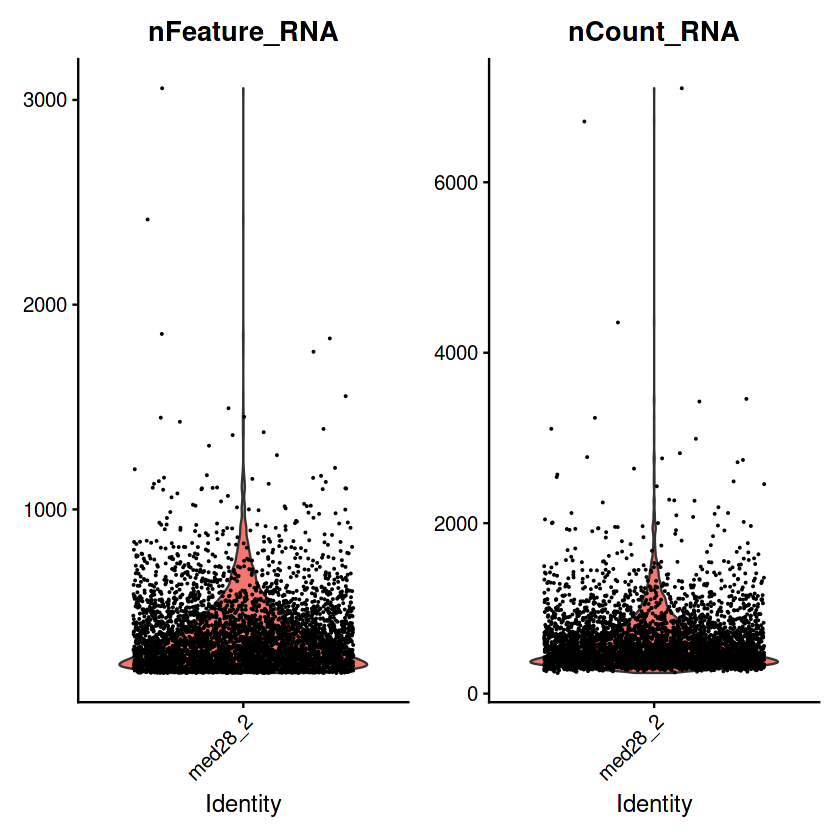

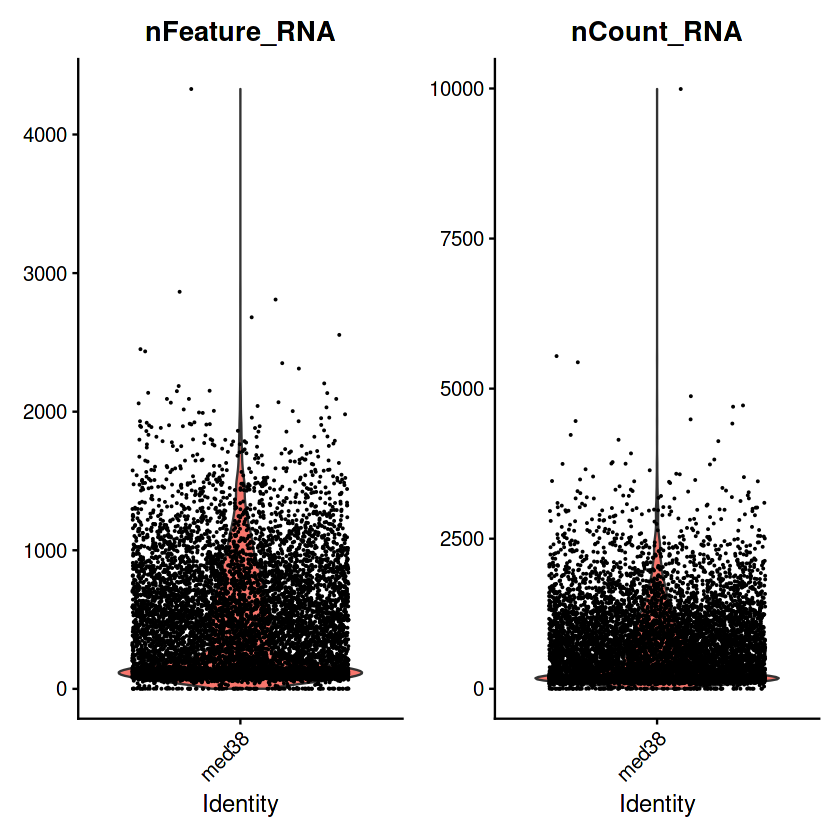

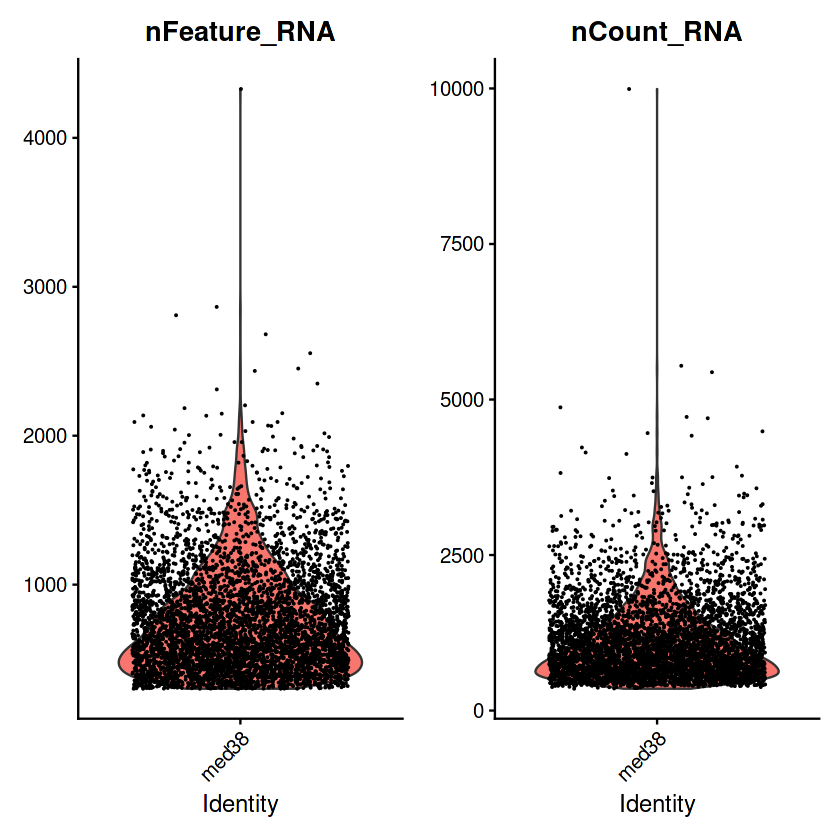

In [2]:
#load data from medicago roots inoculated with AMF:

data.dir1 <-"/global/cfs/projectdirs/m342/plant-microbe_shared/Chromium_outs/Chromium_medicago_outs/MBBC001A_ensembl/outs/filtered_feature_bc_matrix" #med28_1
data.dir2 <-"/global/cfs/projectdirs/m342/plant-microbe_shared/Chromium_outs/Chromium_medicago_outs/output_Mt_with_AMF_MBBC022B/outs/filtered_feature_bc_matrix" #med28_2
data.dir4 <-"/global/cfs/projectdirs/m342/plant-microbe_shared/Chromium_outs/Chromium_medicago_outs/MBBC003A_ensembl/filtered_feature_bc_matrix" #med38


med28_1<-Read10X(
  data.dir1,
  gene.column = 2,
  cell.column = 1,
  unique.features = TRUE,
  strip.suffix = FALSE
)

med28_2<-Read10X(
  data.dir2,
  gene.column = 2,
  cell.column = 1,
  unique.features = TRUE,
  strip.suffix = FALSE
)


med38<-Read10X(
  data.dir4,
  gene.column = 2,
  cell.column = 1,
  unique.features = TRUE,
  strip.suffix = FALSE
)

med28_1<- CreateSeuratObject(counts = med28_1, project="med28_1")
VlnPlot(med28_1, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)
med28_1 <- subset(med28_1,nFeature_RNA > 300)
VlnPlot(med28_1, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)

med28_2 <- CreateSeuratObject(counts = med28_2, project="med28_2")
VlnPlot(med28_2, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)
med28_2 <- subset(med28_2, nFeature_RNA > 200)
VlnPlot(med28_2, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)

med38 <- CreateSeuratObject(counts = med38, project="med38")
VlnPlot(med38, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)
med38 <- subset(med38, nFeature_RNA > 300)
VlnPlot(med38, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2, pt.size = .05)

In [3]:
med28_1 <- SCTransform(med28_1, verbose = TRUE)
med28_1 <- RunPCA(med28_1, npcs = 30, verbose = FALSE)
med28_1 <- RunUMAP(med28_1, reduction = "pca", dims = 1:30)
med28_1 <- FindNeighbors(med28_1, reduction = "pca", dims = 1:30)
med28_1 <- FindClusters(med28_1, resolution = 0.5)

med28_2 <- SCTransform(med28_2, verbose = TRUE)
med28_2 <- RunPCA(med28_2, npcs = 30, verbose = FALSE)
med28_2 <- RunUMAP(med28_2, reduction = "pca", dims = 1:30)
med28_2 <- FindNeighbors(med28_2, reduction = "pca", dims = 1:30)
med28_2 <- FindClusters(med28_2, resolution = 0.5)

med38 <- SCTransform(med38, verbose = TRUE)
med38 <- RunPCA(med38, npcs = 30, verbose = FALSE)
med38 <- RunUMAP(med38, reduction = "pca", dims = 1:30)
med38  <- FindNeighbors(med38, reduction = "pca", dims = 1:30)
med38  <- FindClusters(med38, resolution = 0.5)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 22648 by 7836

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 54 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 22648 genes



  |======================================================================| 100%


Computing corrected count matrix for 22648 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 56.46878 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:25:50 UMAP embedding parameters a = 0.9922 b = 1.112

21:25:50 Read 7836 rows and found 30 numeric columns

21:25:50 Using Annoy for neighbor search, n_neighbors = 30

21:25:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:25:51 Writing NN index file to temp file /tmp/Rtmphz1beo/

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7836
Number of edges: 266588

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 15
Elapsed time: 0 seconds


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16761 by 4227

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4227 cells



  |======================================================================| 100%


Found 99 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16761 genes



  |======================================================================| 100%


Computing corrected count matrix for 16761 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 36.35001 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

21:26:44 UMAP embedding parameters a = 0.9922 b = 1.112

21:26:44 Read 4227 rows and found 30 numeric columns

21:26:44 Using Annoy for neighbor search, n_neighbors = 30

21:26:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:26:44 Writing NN index file to temp file /tmp/Rtmphz1beo/file1de285906f9

21:26:44 Searching Annoy index using 1 thread, search_k = 3000

21:26:46 Annoy recall = 100%

21:26:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:26:47 Initializing from normalized Laplacian + noise (using irlba)

21:26:

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4227
Number of edges: 170900

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8140
Number of communities: 8
Elapsed time: 0 seconds


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 20594 by 4827

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4827 cells



  |======================================================================| 100%


Found 106 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 20594 genes



  |======================================================================| 100%


Computing corrected count matrix for 20594 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 43.13024 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

21:27:38 UMAP embedding parameters a = 0.9922 b = 1.112

21:27:38 Read 4827 rows and found 30 numeric columns

21:27:38 Using Annoy for neighbor search, n_neighbors = 30

21:27:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:27:39 Writing NN index file to temp file /tmp/Rtmphz1beo/file1de28549c84d76

21:27:39 Searching Annoy index using 1 thread, search_k = 3000

21:27:40 Annoy recall = 100%

21:27:40 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:27:41 Initializing from normalized Laplacian + noise (using irlba)

21:

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4827
Number of edges: 175547

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8671
Number of communities: 13
Elapsed time: 0 seconds


In [4]:
#integrate three datasets from inoculated samples:

med.list<-c(med28_1, med28_2, med38)

med.features <- SelectIntegrationFeatures(object.list = med.list, nfeatures=3000)

all.genes <- lapply(med.list, row.names) %>% Reduce(c, .) %>% unique()

med.list <-PrepSCTIntegration(med.list,assay = NULL,anchor.features=med.features,sct.clip.range = NULL,verbose = TRUE)

med.anchors <- FindIntegrationAnchors(object.list = med.list, normalization.method = "SCT", anchor.features = med.features)

med <- IntegrateData(anchorset = med.anchors, normalization.method = "SCT", verbose = TRUE, features.to.integrate = all.genes)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10022 anchors

Filtering anchors

	Retained 7744 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 11806 anchors

Filtering anchors

	Retained 9648 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9184 anchors

Filtering anchors

	Retained 6373 anchors

sct.model: model1

Setting min_variance to:  -Inf

Calculating residuals of type pearson for 13236 genes



  |======================================================================| 100%


sct.model: model1

Setting min_variance to:  -Inf

Calculating residuals of type pearson for 13236 genes



  |======================================================================| 100%


sct.model: model1

Setting min_variance to:  -Inf

Calculating residuals of type pearson for 13236 genes



  |======================================================================| 100%


Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 1 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


In [5]:
DefaultAssay(med)<-'integrated'
med <- RunPCA(med, npcs = 30, verbose = FALSE)
med <- RunUMAP(med, reduction = "pca", dims = 1:30, metric='cosine')
med <- FindNeighbors(med, reduction = "pca", dims = 1:30)
med <- FindClusters(med, resolution = 0.5)

21:42:56 UMAP embedding parameters a = 0.9922 b = 1.112

21:42:56 Read 16890 rows and found 30 numeric columns

21:42:56 Using Annoy for neighbor search, n_neighbors = 30

21:42:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:42:58 Writing NN index file to temp file /tmp/Rtmphz1beo/file1de2852555de6a

21:42:58 Searching Annoy index using 1 thread, search_k = 3000

21:43:04 Annoy recall = 100%

21:43:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:43:06 Initializing from normalized Laplacian + noise (using irlba)

21:43:06 Commencing optimization for 200 epochs, with 730672 positive edges

21:43:14 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16890
Number of edges: 635297

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 16
Elapsed time: 2 seconds


In [7]:
#visualize integrated dataset by cell type and by dataset

#name clusters:
med <- RenameIdents(object = med,
"0" = "Cortex 1",
"1" = "Cortex 2",
"2" = "Cortex 3",
"3" = "Cortex 4",
"4" = "Pericycle",
"5" = "Stele", 
"6" = "Cortex 5", 
"7" = "Endodermis", 
"8" = "LRP", 
"9" = "Cortex 6",
"10" = "Cortex 7", 
"11" = "Epidermis", 
"12" = "Colonized Cortex",
"13" = "Cortex 8",
"14" = "Phloem", 
"15" = "Xylem")

colors = c("#FF9999",
"#FF6666",
"#CC99FF",
"#FF6699",
"#ff9933",
"#FFCC66",
"#CC6699",
"#99CCCC",
"#66CC99",
"#FF99FF",
"#FF99CC",
"#99CCFF",
"#990000",
"#FFCCCC",
"#CC9999",
"#996666")

cell_type<-Idents(object = med)

#Figure 1b
DimPlot(med, reduction = "umap", group.by = "cell_type", label = TRUE, pt.size = 1, cols=colors)
DimPlot(med, group.by="orig.ident", shuffle=TRUE)

 [1] "A17-----------MTR-7g045370" "A17-----------MTR-3g109610"
 [3] "A17-----------MTR-1g028600" "A17-----------MTR-8g022270"
 [5] "A17-----------MTR-4g081190" "A17-----------MTR-3g107870"
 [7] "A17-----------MTR-3g093270" "A17-----------MTR-7g062580"
 [9] "A17-----------MTR-8g006790" "A17-----------MTR-7g092620"
[11] "A17-----------MTR-3g058840" "A17-----------MTR-3g115940"
[13] "A17-----------MTR-3g093430" "A17-----------MTR-1g050525"
[15] "A17-----------MTR-8g068265" "A17-----------MTR-7g027190"


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


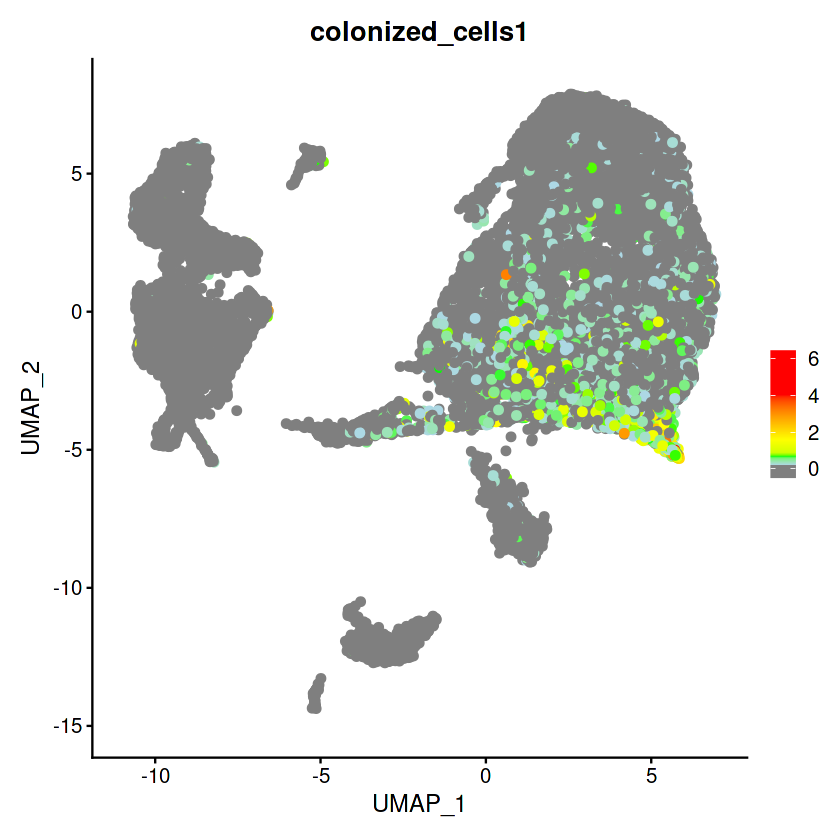

21:50:34 UMAP embedding parameters a = 0.9922 b = 1.112

21:50:34 Read 845 rows and found 30 numeric columns

21:50:34 Using Annoy for neighbor search, n_neighbors = 30

21:50:34 Annoy build: subtracting row means for correlation

21:50:34 Building Annoy index with metric = correlation, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:50:34 Annoy search: subtracting row means for correlation

21:50:34 Writing NN index file to temp file /tmp/Rtmphz1beo/file1de2856923041

21:50:34 Searching Annoy index using 1 thread, search_k = 3000

21:50:35 Annoy recall = 100%

21:50:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:50:36 Initializing from normalized Laplacian + noise (using irlba)

21:50:36 Commencing optimization for 500 epochs, with 32858 positive edges

21:50:

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 845
Number of edges: 34586

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7316
Number of communities: 5
Elapsed time: 0 seconds


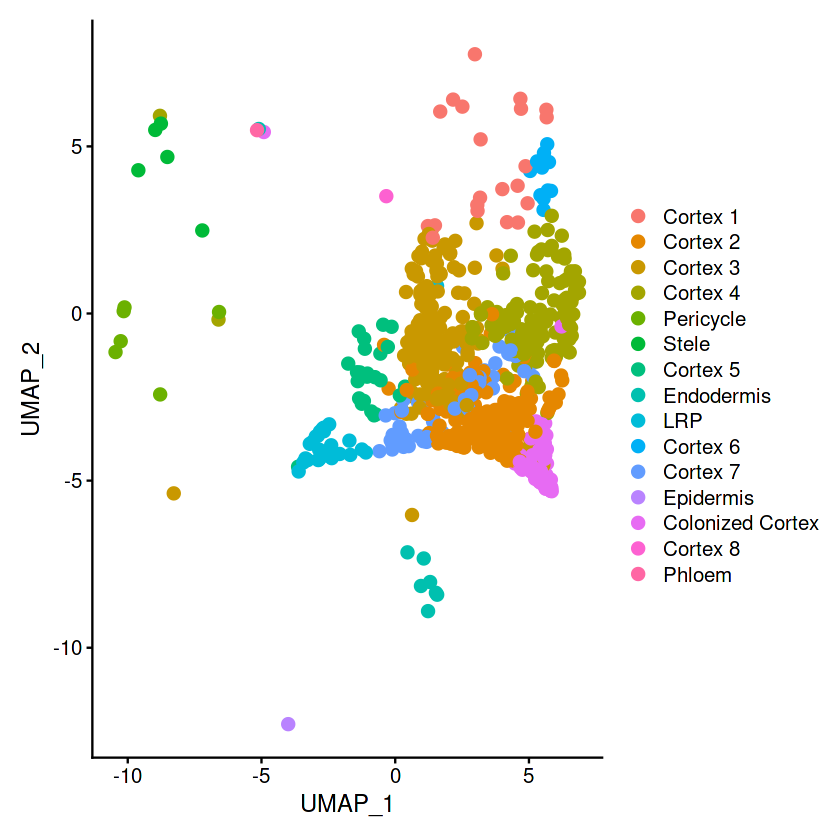

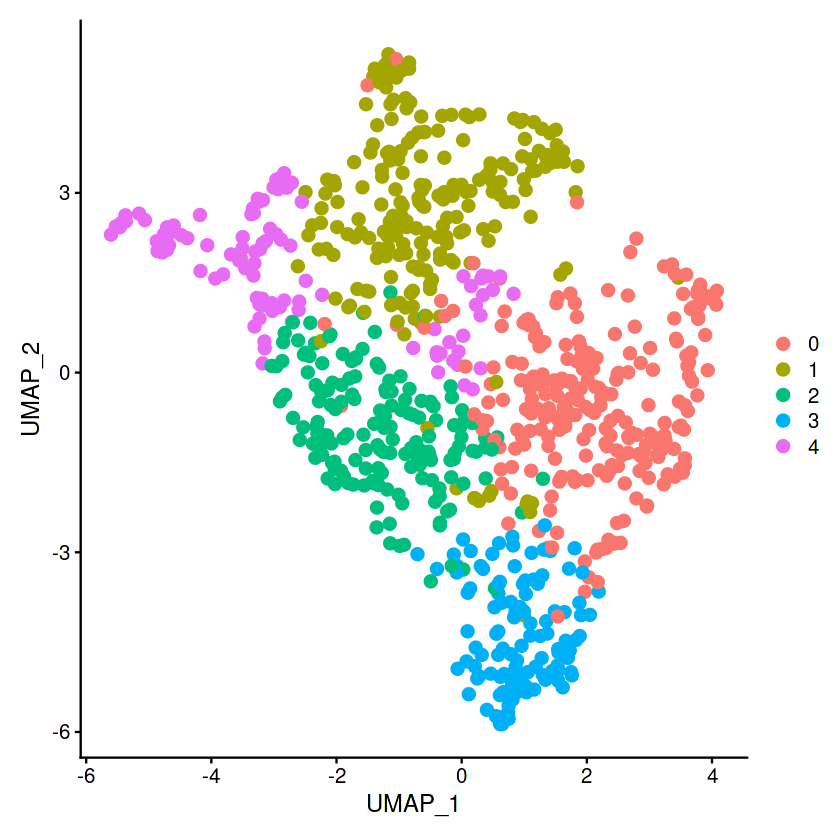

In [12]:
#to subset colonized cells based on literature marker genes:

AMF_genes <- c("A17-----------MTR-7g045370",
               "A17-----------MTR-3g109610",
               "A17-----------MTR-1g028600",
               "A17-----------MTR-8g022270",
               "A17-----------MTR-4g081190",
               "A17-----------MTR-3g107870",
               "A17-----------MTR-3g093270",
               "A17-----------MTR-7g062580",
               "A17-----------MTR-8g006790",
               "A17-----------MTR-7g092620",
               "A17-----------MTR-3g058840",
               "A17-----------MTR-3g115940",
               "A17-----------MTR-3g093430",
               "A17-----------MTR-1g050525",
               "A17-----------MTR-8g068265",
               "A17-----------MTR-7g027190")

DefaultAssay(med)<-'RNA'
med <- AddModuleScore(med, features = list(AMF_genes), name='colonized_cells')

#to visualize module scores:
FeaturePlot(med, features = "colonized_cells1", pt.size = 2, label = FALSE, repel = TRUE) + scale_colour_gradientn(colours = c("red","red","yellow","green","lightblue"), values = c(1.0,0.8,0.6,0.4,0.2,0.175, 0.15,0.1))

#subset cells >95th percentile to new object:
#colonized_cluster_cells<-subset(rownames for which 'colonized_cells1' is in the 95th percentile)
colonized_cells <- subset(x = med, subset = colonized_cells1 > quantile(med$colonized_cells1,0.95))

DimPlot(colonized_cells, pt.size=3, label.size= 10, label = FALSE)

#recluster colonized subset
DefaultAssay(colonized_cells)<-'integrated'
colonized_cells <- RunPCA(colonized_cells, npcs = 30, verbose = FALSE)
colonized_cells <- RunUMAP(colonized_cells, reduction = "pca", dims = 1:30, metric='correlation')
colonized_cells <- FindNeighbors(colonized_cells, reduction = "pca", dims = 1:30)
colonized_cells <- FindClusters(colonized_cells, resolution = 0.5) 

#Figure 3b (left)

DimPlot(colonized_cells, pt.size = 3,label.size= 10, label = FALSE)  

In [14]:
#set colonized cluster as sobj for ggplots:
sobj<-colonized_cells

#ggplot function (for Figure 3b)
get_reduction <- function(sobj, reduction_name) {
  rd <- Embeddings(sobj, reduction = reduction_name) %>% 
    as_tibble(rownames = "Cell")
}

get_cell_data <- function(sobj, features = NULL, melt = TRUE) {
  md <- as_tibble(sobj@meta.data, rownames = "Cell")
  reducs <- names(sobj@reductions)
  rd <- map(reducs, get_reduction, sobj = sobj) %>% reduce(left_join)
  combined_data <- left_join(md, rd)
  if(!is.null(features)) {
    exp_data <- GetAssayData(sobj[features,], slot = "counts", assay = "RNA") %>% 
      Matrix::t() %>% 
      as_tibble(rownames = "Cell")
    if(melt) {
      exp_data <- gather(exp_data, "Locus", "Counts", -Cell)
    }
    combined_data <- left_join(combined_data, exp_data)
  }
  return(combined_data)
}

cell_data <- get_cell_data(sobj)

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


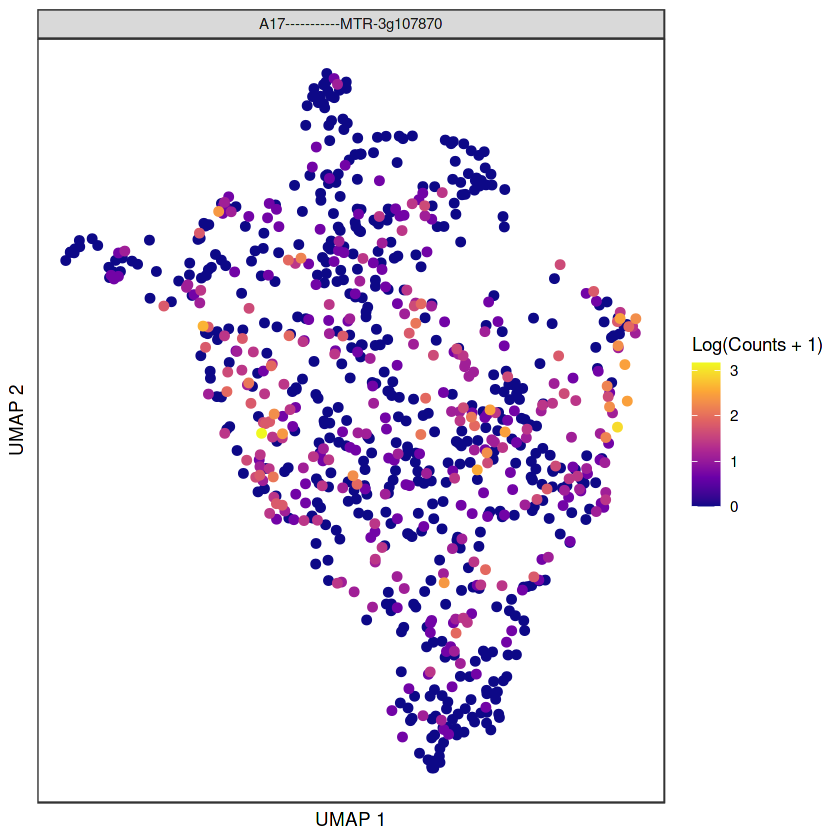

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


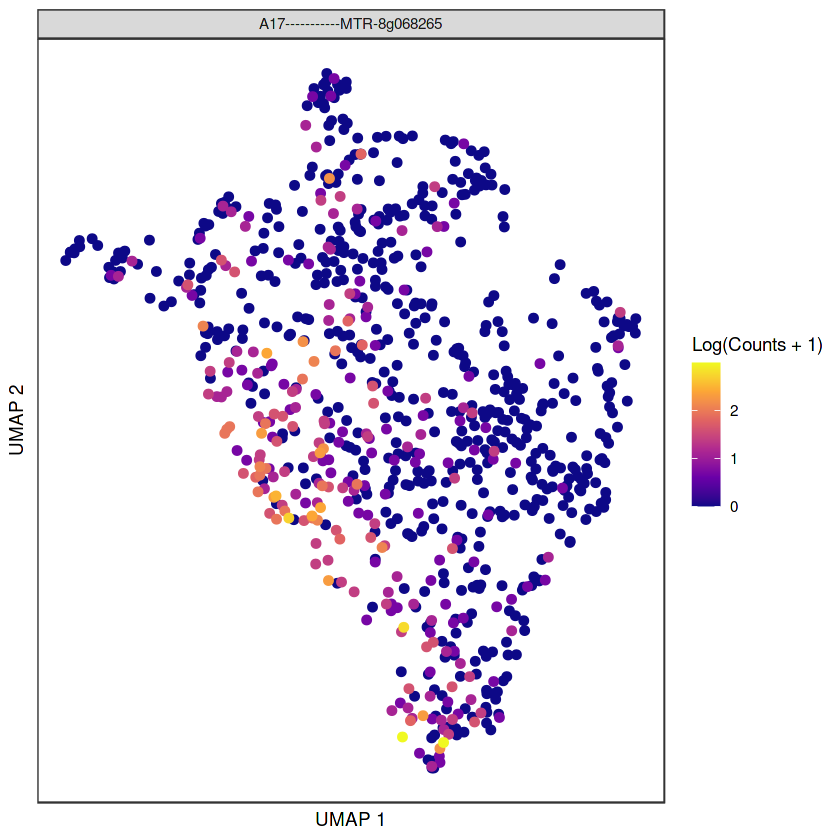

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


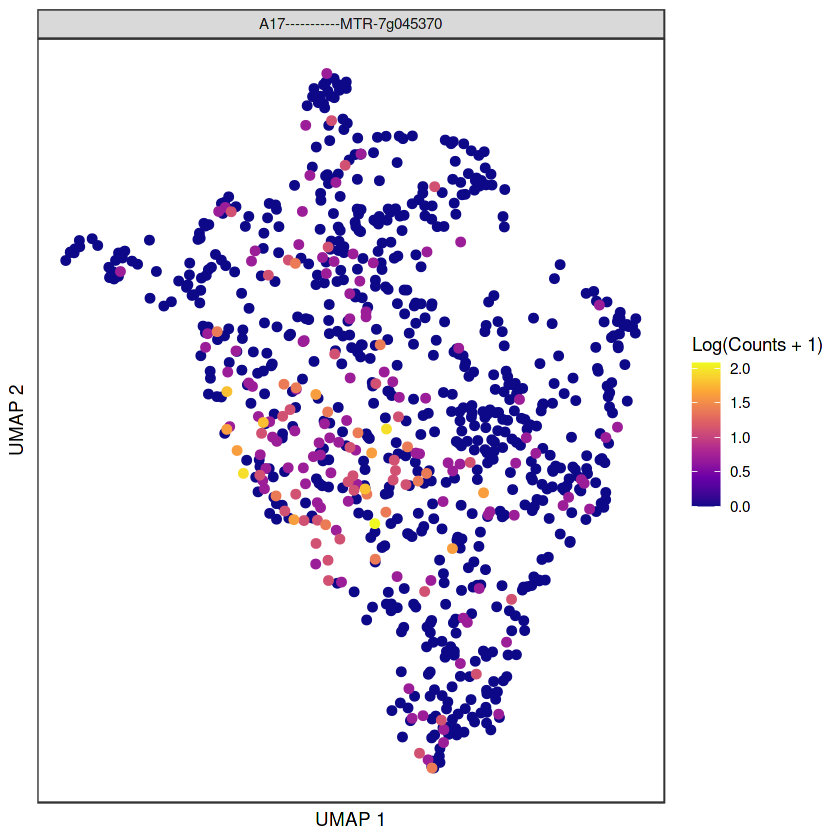

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


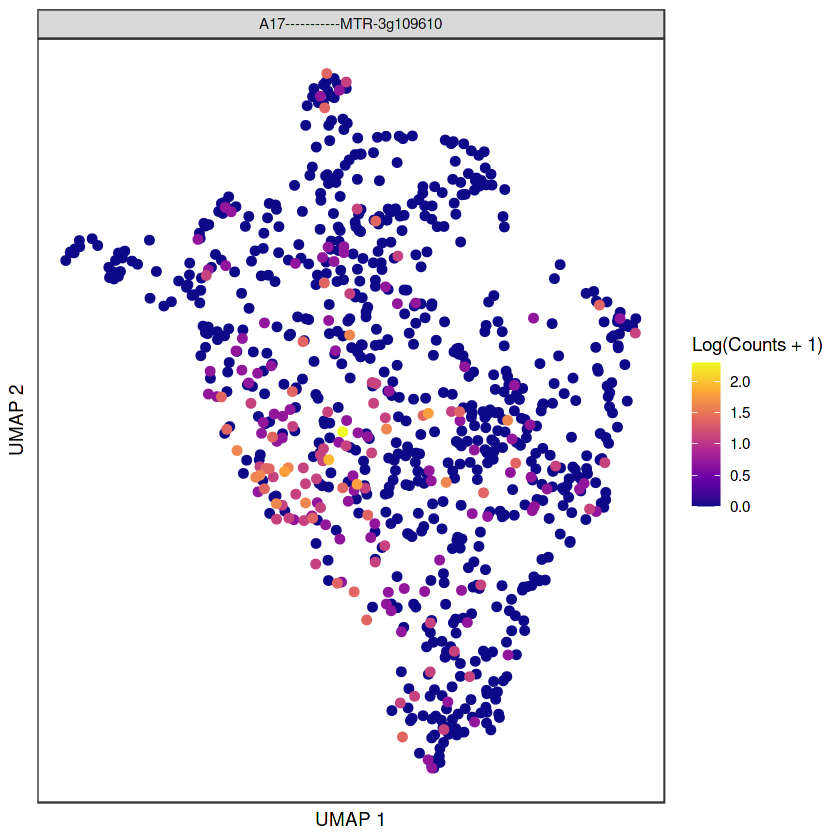

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


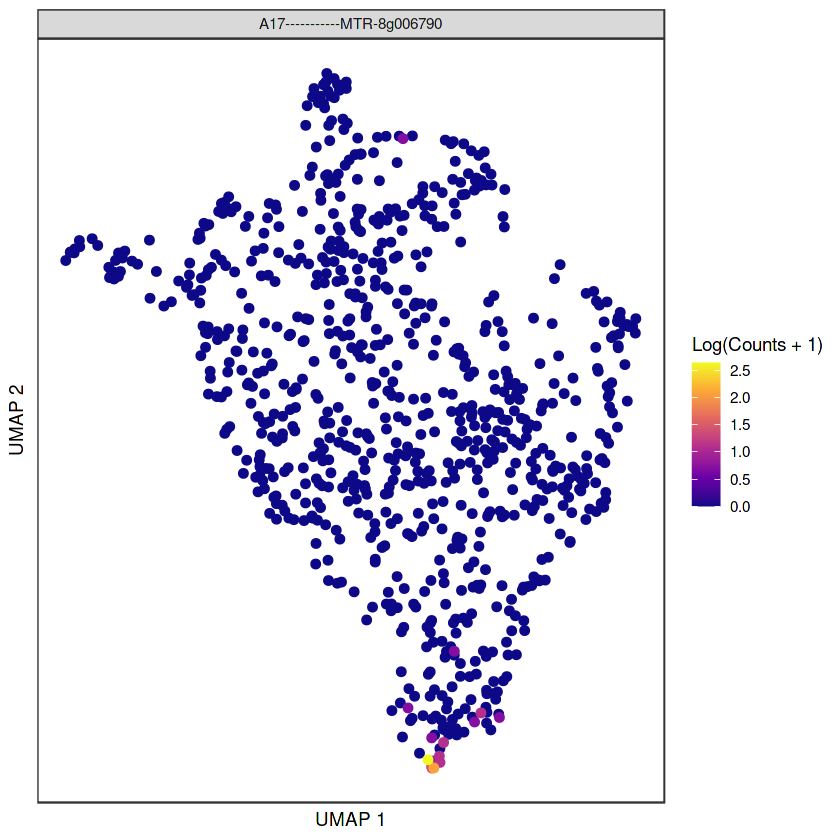

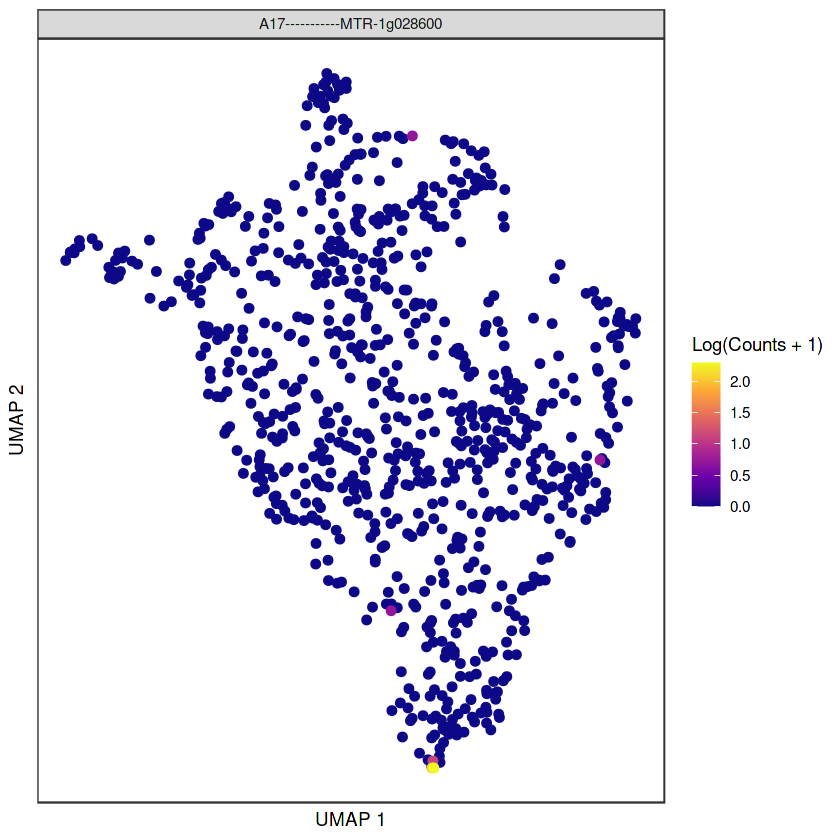

In [15]:
#Figure 3b (right)
## Plot by expression

features <- c("A17-----------MTR-3g107870") #ABCG59 early
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_ABCG59_early.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)

features <- c("A17-----------MTR-8g068265") #DXS2 mid
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_DXS2_mid.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)

features <- c("A17-----------MTR-7g045370") #ccd7 mid
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_CCD7_mid.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-3g109610") #ccd1 mid
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_CCD1_mid.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-8g006790") #ATPase late
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_ATPase_late.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-1g028600") #pt4 late
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("CC_PT4_late.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


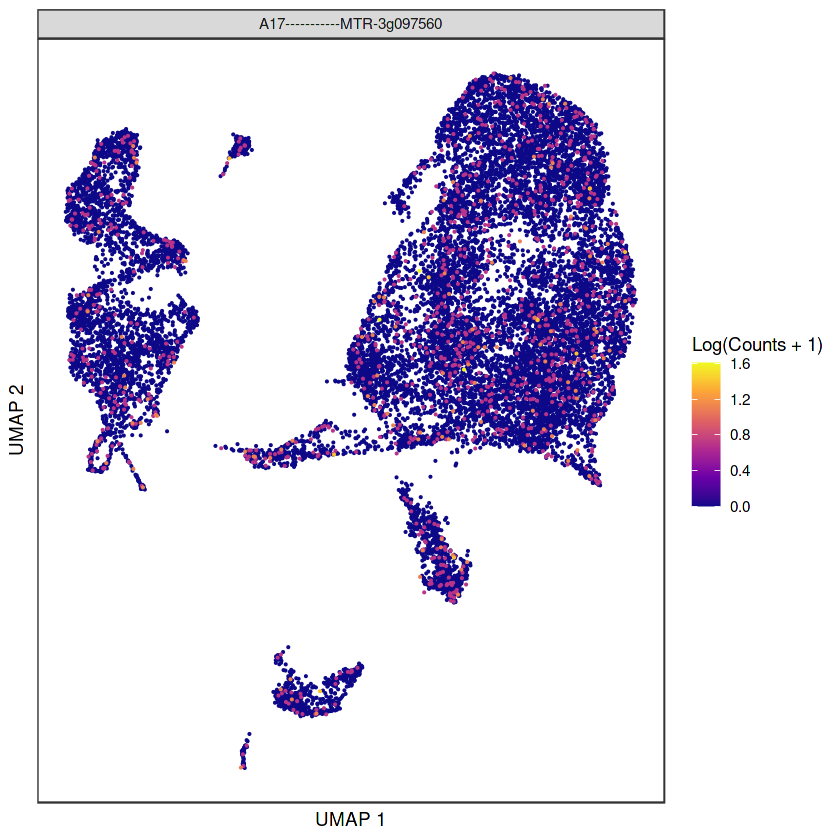

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


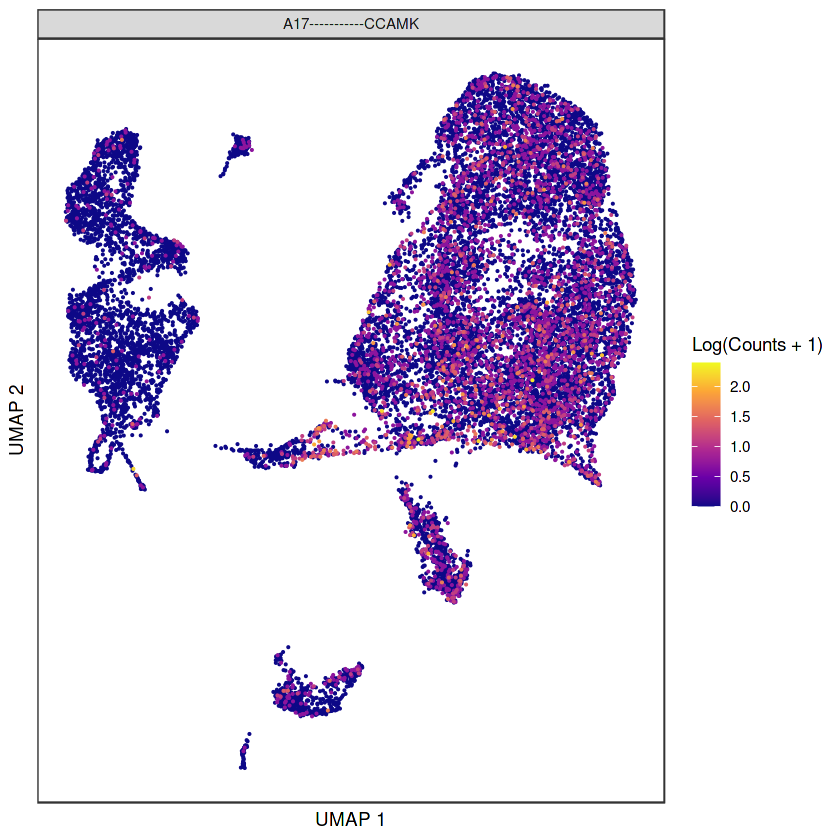

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


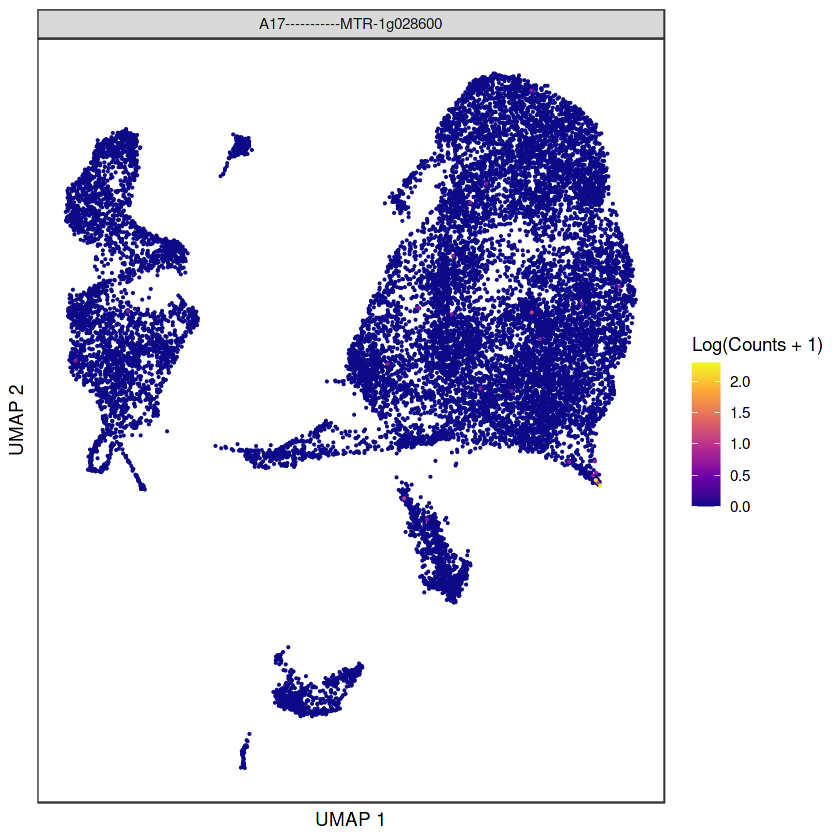

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


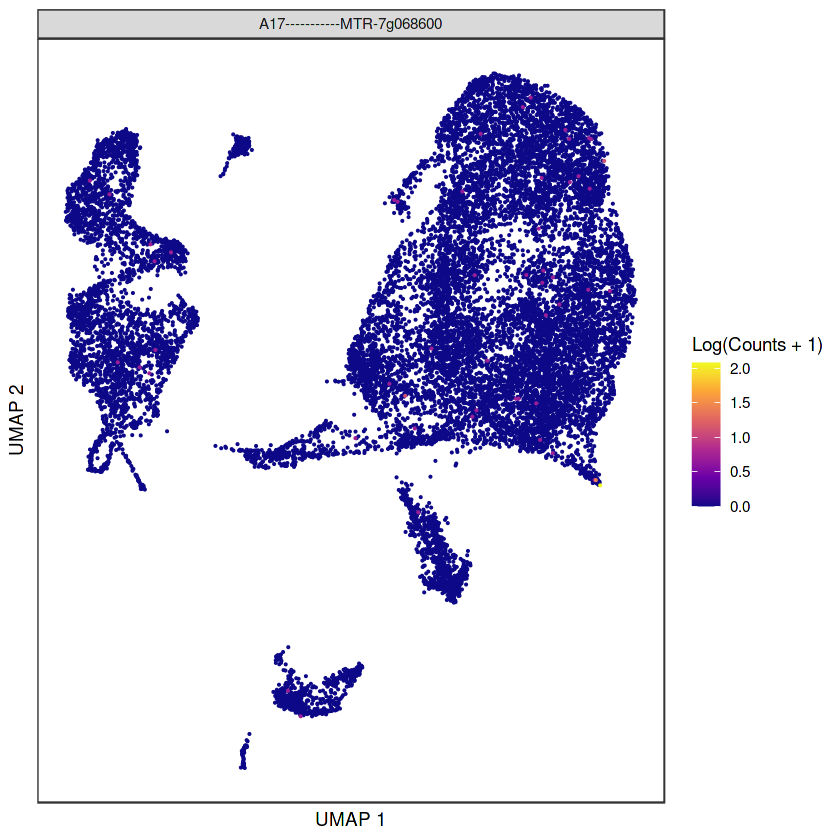

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


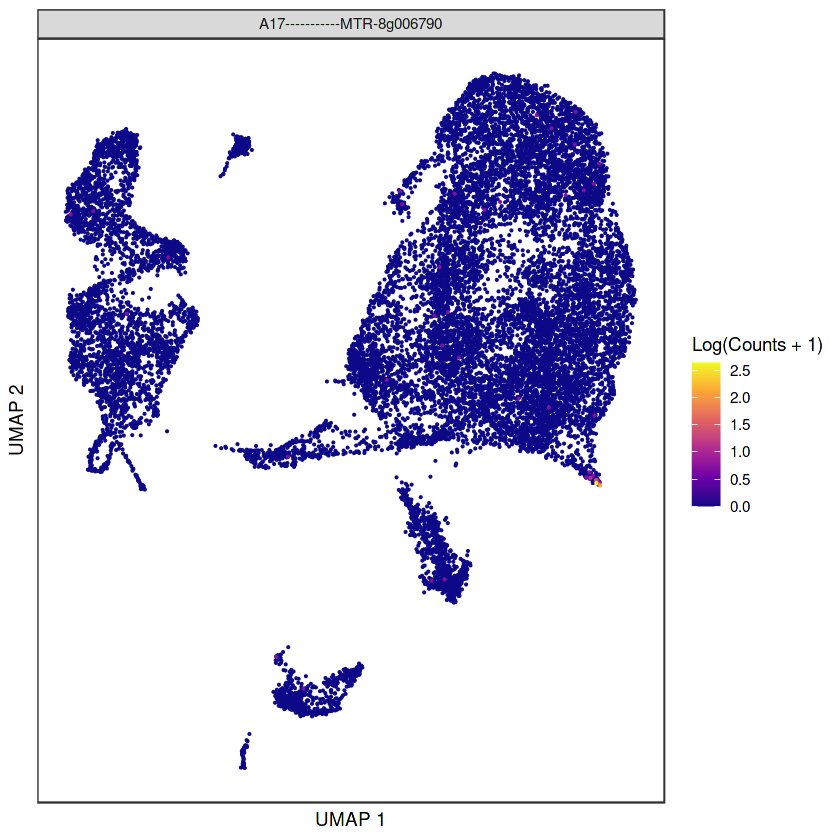

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


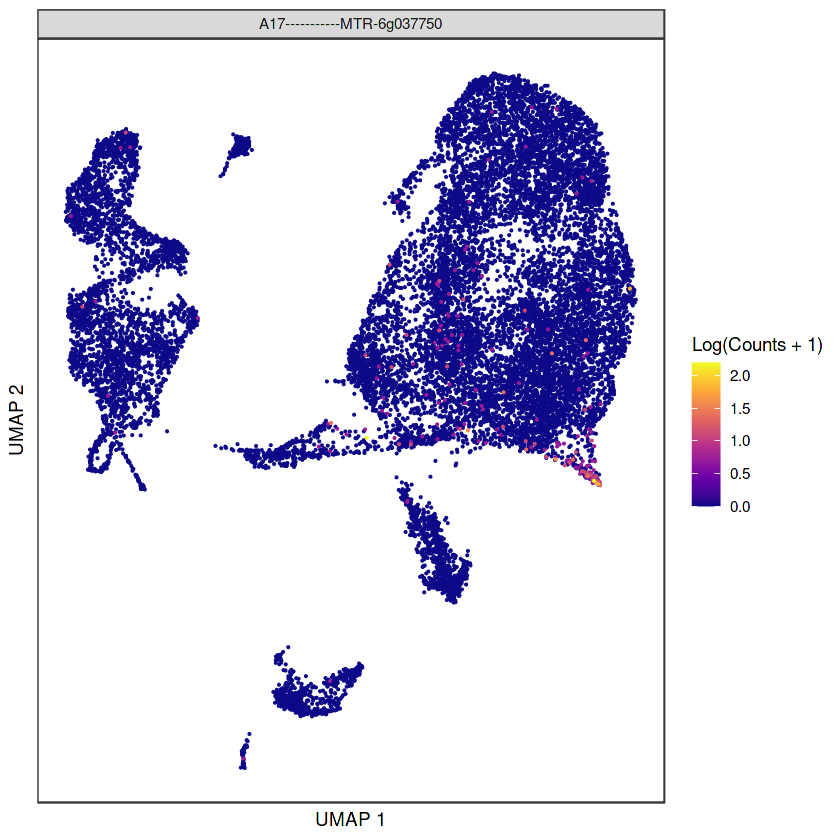

Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`
Joining with `by = join_by(Cell)`


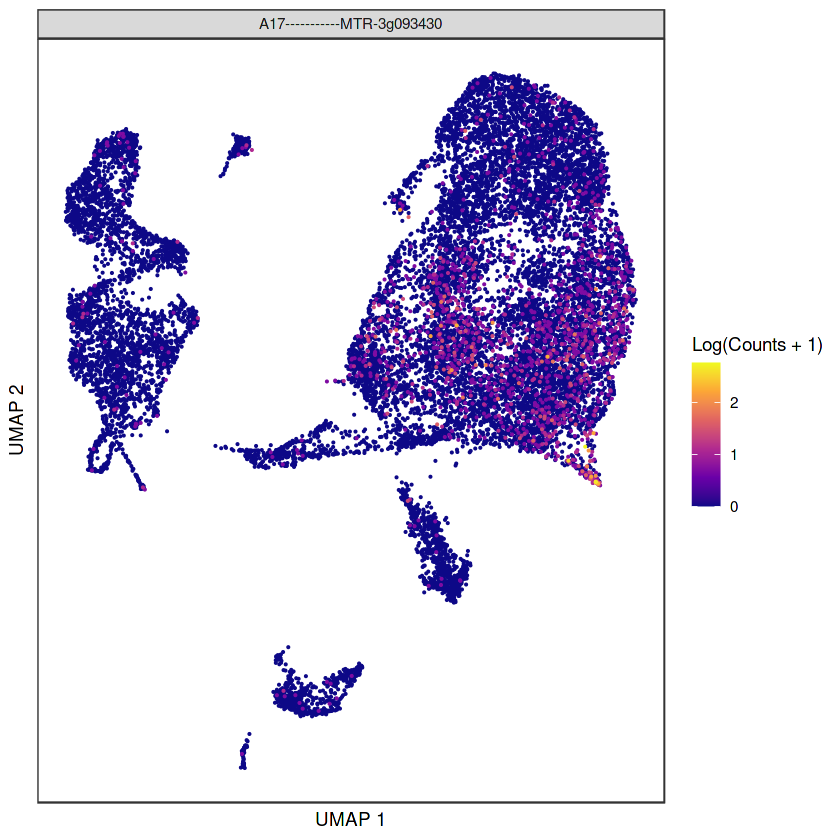

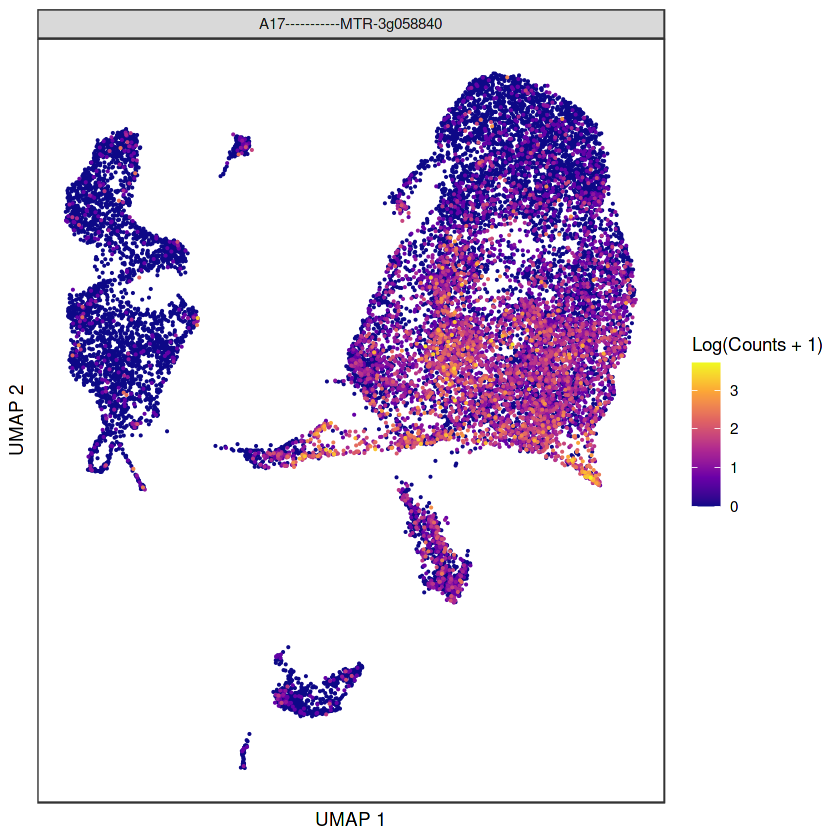

In [16]:
#for Fig 3a, Fig 4b and 4c

sobj<- med

#ggplot function
get_reduction <- function(sobj, reduction_name) {
  rd <- Embeddings(sobj, reduction = reduction_name) %>% 
    as_tibble(rownames = "Cell")
}

get_cell_data <- function(sobj, features = NULL, melt = TRUE) {
  md <- as_tibble(sobj@meta.data, rownames = "Cell")
  reducs <- names(sobj@reductions)
  rd <- map(reducs, get_reduction, sobj = sobj) %>% reduce(left_join)
  combined_data <- left_join(md, rd)
  if(!is.null(features)) {
    exp_data <- GetAssayData(sobj[features,], slot = "counts", assay = "RNA") %>% 
      Matrix::t() %>% 
      as_tibble(rownames = "Cell")
    if(melt) {
      exp_data <- gather(exp_data, "Locus", "Counts", -Cell)
    }
    combined_data <- left_join(combined_data, exp_data)
  }
  return(combined_data)
}

cell_data <- get_cell_data(sobj)


#Fig 3a:

features <- c("A17-----------MTR-3g107870") #ABCG59 early
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig3_ABCG59_early.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)

features <- c("A17-----------MTR-8g068265") #DXS2 mid
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=2) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig3_DXS2_mid.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)



#Fig 4b, 4c:

## Plot by expression
features <- c("A17-----------MTR-3g097560") #PDR1 homolog
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)), size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_PDR1.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)

features <- c("A17-----------CCAMK") #CCAMk
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_CCAMK.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-1g028600") #pt4
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_pt4.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-7g068600") #myb1
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_myb1.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)

#genes of unknown function highly correlated with known marker genes

features <- c("A17-----------MTR-8g006790") #ATPase
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_ATPase_.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-6g037750") #LRR domain protein
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_lrr.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-3g093430") #ABC19
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_ABC19.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


features <- c("A17-----------MTR-3g058840") #other LRR
cell_data <- get_cell_data(sobj, features = features)
ggplot(arrange(cell_data, Counts), aes(x = UMAP_1, y = UMAP_2)) +
  geom_point(aes(color = log1p(Counts)),size=0.1) +
  scale_color_viridis_c(name = "Log(Counts + 1)", option = "plasma") +
  labs(x = "UMAP 1", y = "UMAP 2") +
  facet_wrap("Locus") +
  theme_bw() +
  theme(panel.grid = element_blank(),
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())

ggsave("Fig4_med_LRR2.pdf", plot=last_plot(), device="pdf", width = 5.5, height = 4, units="in", dpi = 300)


In [ ]:
#Supp Sheet 4
#DEG anaylsis between colonized cluster 14 and rest of cortical cells
med_condensed <- med
med_condensed <- RenameIdents(object = med_condensed,
"Cortex 1" = "Cortex",
"Cortex 2" = "Cortex",
"Cortex 3" = "Cortex",
"Cortex 4" = "Cortex",
"Cortex 6" = "Cortex",
"Cortex 7" = "Cortex",
"Cortex 8" = "Cortex")

med_condensed <- FindMarkers(med_condensed, ident.1 = "Colonized Cortex", ident.2 = "Cortex", only.pos = TRUE, assay = "RNA",verbose = FALSE)
write.csv(med_condensed, "colonized_markers_June27.csv")